<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/Project1/Cp3/Checkpoint3_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 3

Implement here your algorithm to estimate the parametric field from timings recorded in the 20 electrodes of the mapping catheter.

The algorithm should output the following information:
- your estimates of parametric field


In [ ]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
!git clone https://github.com/Alepescinaa/ScientificTools
%cd ScientificTools/Project1/Cp3

fatal: destination path 'ScientificTools' already exists and is not an empty directory.
/content/ScientificTools/Project1/Cp3


In [ ]:
CP3data = np.load("CP3data.npz")
CP3data = CP3data['arr_0']

CP3estimate = np.load("CP3field.npz")
CP3estimate = CP3estimate['arr_0']

In [ ]:
ind_disp = 64
x_meas = CP3data[ind_disp][0]
y_meas = CP3data[ind_disp][1]
t_meas = CP3data[ind_disp][2]

speed_field = CP3estimate[ind_disp][0]

In [ ]:
X, Y = np.meshgrid(np.linspace(-1.5,1.5,151), np.linspace(-1.5,1.5,151))

# Find initialization map

In [ ]:
index = np.zeros(100)

for i in range(100):
  speed_field = CP3estimate[i][0]

  count = np.sum(speed_field >= 98)
  if count > 0.56 * 151**2:
    index[i] = 1

np.where(index == 1)[0]

array([ 4,  6, 10, 16, 26, 29, 38, 50, 64, 84, 87, 90, 97])

In [ ]:
theta_fiber = np.mean(np.array([0.1268976, 0.11615946, 0.13284018, 0.10337211, 0.21694398, 0.12920869]))
a_ratio = np.mean(np.array([6.43469979, 5.92906072, 6.26133001, 4.95760936, 6.21685213, 5.57823901]))
y0 = np.mean(np.array([-0.51359229, -0.50047581, -0.52069896, -0.50074575, -0.55399696, -0.51495002]))
theta_fiber, a_ratio, y0

(0.13757033666666668, 5.896298503333333, -0.517409965)

# SVD and compressed sensing

Text(0.5, 1.0, 'Explained variance')

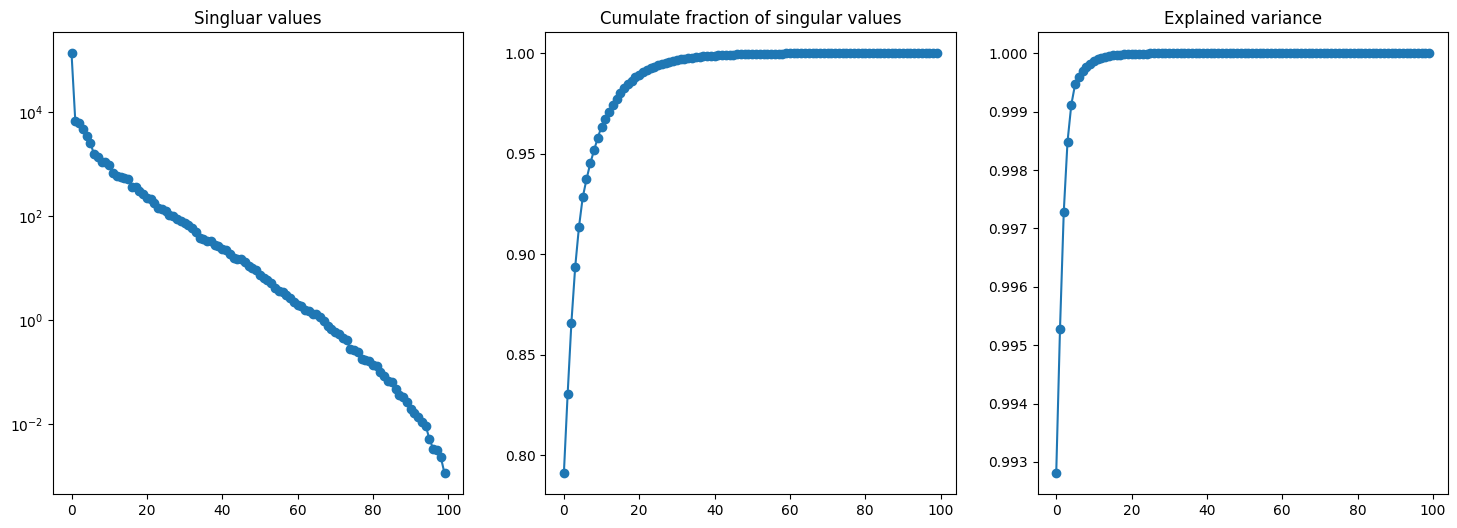

In [ ]:
mesh_size = 151**2
num_samples = 100
A = np.zeros((mesh_size, num_samples))

for i in range(num_samples):
  A[:, i] = CP3estimate[i][0].flatten()

[U,s,V] = np.linalg.svd(A, full_matrices=False)

fig, axes = plt.subplots(1, 3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

Visualization basis functions

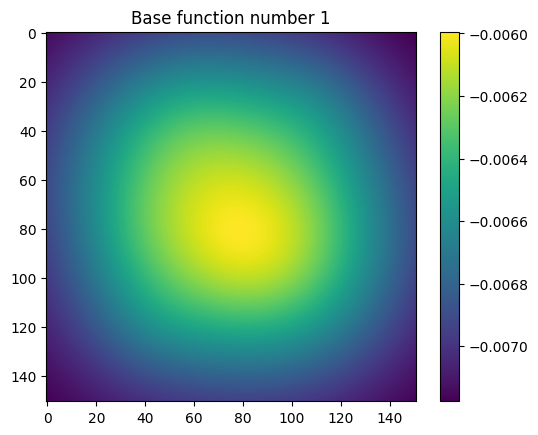

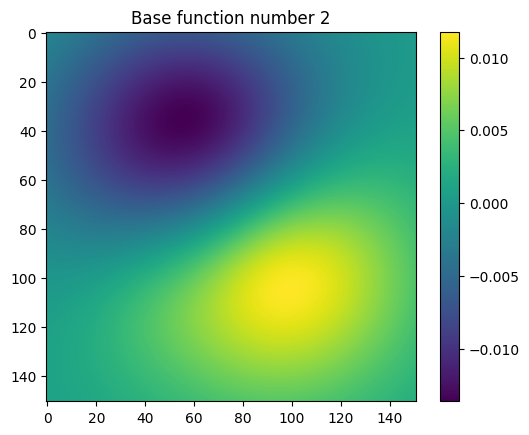

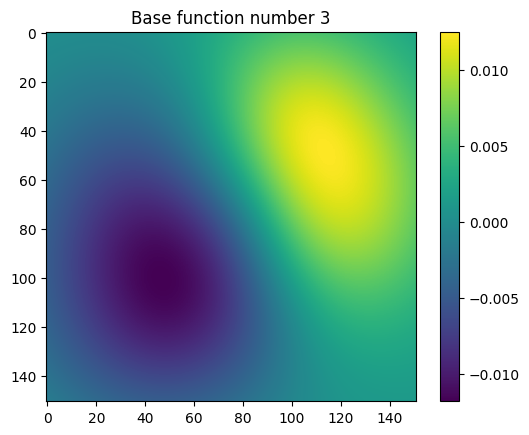

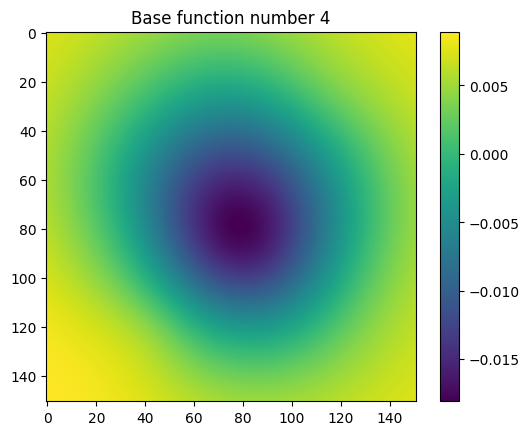

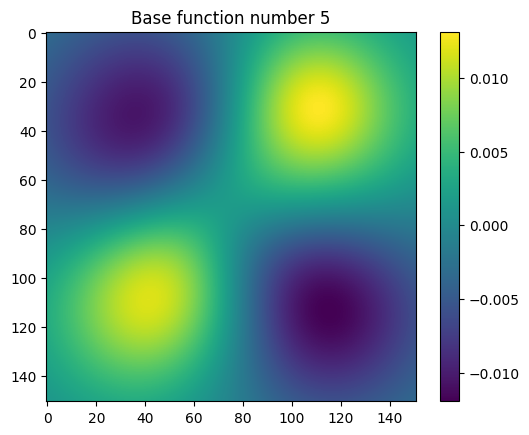

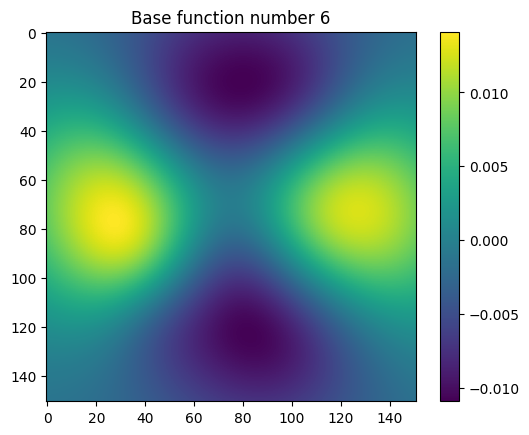

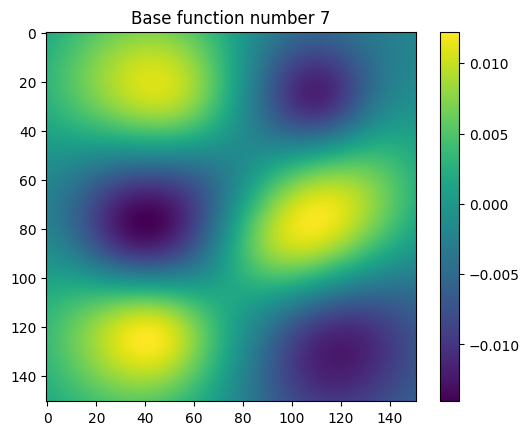

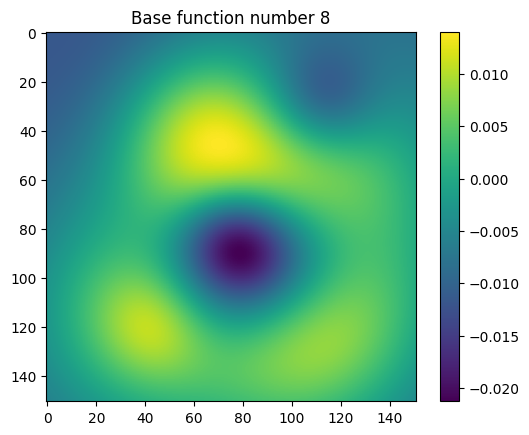

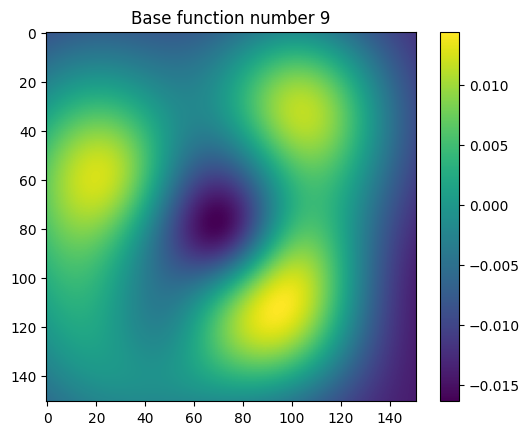

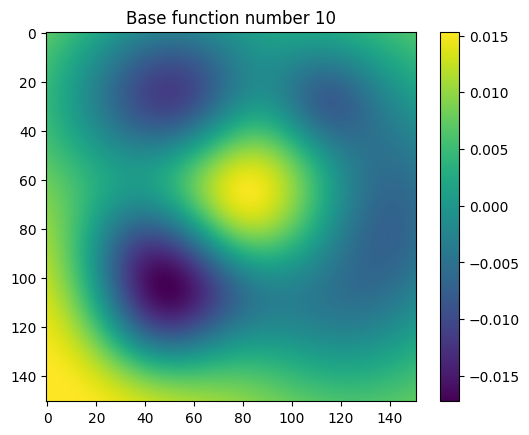

In [ ]:
k = 10

for i in range(k):
  U_k = U[:, i].reshape(151, 151)
  plt.imshow(U_k)
  plt.title(f"Base function number {i+1}")
  plt.colorbar()
  plt.show()

In [ ]:
k = 10
p = 100
perm = np.random.choice(mesh_size, size=p, replace=False)

C = np.zeros((p,mesh_size))
for i in range(p):
    C[i,perm[i]] = 1.0

Theta = C @ U
coeff_mat = np.zeros((k, 100))

for i in range (100):
  u = A[:,i]
  y = C @ u
  s_c = cvx.Variable(U.shape[1])
  constraints = [Theta @ s_c == y]
  obj = cvx.Minimize(cvx.norm(s_c, 1))
  prob = cvx.Problem(obj, constraints)
  prob.solve()
  coeff_mat[:, i] = s_c.value[:k]

In [ ]:
coeff_mat[:, 64]

array([-14866.0872933 ,    -93.31329765,     61.02130193,   -632.15035466,
          -93.08610713,    109.84651585,    -59.45441162,     23.9102118 ,
           82.14031074,    -53.28439878])

In [ ]:
coeff_mat[:, 10]

array([-1.46493777e+04, -5.14637980e+02, -2.73579050e+02, -6.19120056e+02,
        4.97519963e+02,  4.89000297e+01,  2.03062201e+02, -7.27896884e+01,
        7.60803708e+01,  5.25227549e+00])

In [ ]:
c1_min, c1_max = np.min(coeff_mat[0, :]), np.max(coeff_mat[0, :])
c2_min, c2_max = np.min(coeff_mat[1, :]), np.max(coeff_mat[1, :])
c3_min, c3_max = np.min(coeff_mat[2, :]), np.max(coeff_mat[2, :])
c4_min, c4_max = np.min(coeff_mat[3, :]), np.max(coeff_mat[3, :])
c5_min, c5_max = np.min(coeff_mat[4, :]), np.max(coeff_mat[4, :])
c6_min, c6_max = np.min(coeff_mat[5, :]), np.max(coeff_mat[5, :])
c7_min, c7_max = np.min(coeff_mat[6, :]), np.max(coeff_mat[6, :])
c8_min, c8_max = np.min(coeff_mat[7, :]), np.max(coeff_mat[7, :])
c9_min, c9_max = np.min(coeff_mat[8, :]), np.max(coeff_mat[8, :])
c10_min, c10_max = np.min(coeff_mat[9, :]), np.max(coeff_mat[9, :])

delta_c1 = c1_max - c1_min
delta_c2 = c2_max - c2_min
delta_c3 = c3_max - c3_min
delta_c4 = c4_max - c4_min
delta_c5 = c5_max - c5_min
delta_c6 = c6_max - c6_min
delta_c7 = c7_max - c7_min
delta_c8 = c8_max - c8_min
delta_c9 = c9_max - c9_min
delta_c10 = c10_max - c10_min

print(f"c1 in ({c1_min}, {c1_max})")
print(f"c2 in ({c2_min}, {c2_max})")
print(f"c3 in ({c3_min}, {c3_max})")
print(f"c4 in ({c4_min}, {c4_max})")
print(f"c5 in ({c5_min}, {c5_max})")
print(f"c6 in ({c6_min}, {c6_max})")
print(f"c7 in ({c7_min}, {c7_max})")
print(f"c8 in ({c8_min}, {c8_max})")
print(f"c9 in ({c9_min}, {c9_max})")
print(f"c10 in ({c10_min}, {c10_max})")

c1 in (-14901.761465065383, -12144.027569196021)
c2 in (-1643.3527853797402, 1582.214346206484)
c3 in (-1666.6213886505418, 1707.6151446093222)
c4 in (-776.321704417278, 1280.5856277241194)
c5 in (-1093.9742899213563, 1047.5996203546017)
c6 in (-717.04211979506, 537.6178015506446)
c7 in (-469.9959149069475, 438.8180613585788)
c8 in (-328.7798028736168, 528.7542358977598)
c9 in (-257.8054907947364, 317.6061076812655)
c10 in (-216.04084649711956, 357.6236928829523)


# Initialization velocity

In [ ]:
from scipy.interpolate import RBFInterpolator

def checkpoint1_solution_bis(x, y, t, X, Y, s_value=0.05, s_aniso_1=0.5, s_aniso_2=0.5):
    coordinates = np.column_stack((x, y))

    mesh_coordinates=np.column_stack((X.ravel(), Y.ravel()))

    s = [s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_aniso_1, s_value,s_value,s_value,s_value, s_aniso_2,s_value,s_value,s_value,s_value]

    rbf = RBFInterpolator(coordinates, t, neighbors=None, smoothing=s, kernel='thin_plate_spline', epsilon=None, degree=1)

    time_pred = rbf(mesh_coordinates)
    time_pred=time_pred.reshape(151,151)

    grad_x, grad_y = np.gradient(time_pred)

    vel_pred = 1.0/( np.sqrt((grad_x/(3.0/150))**2+(grad_y/(3.0/150))**2) + 1e-4)
    treshold=160
    if np.max(vel_pred)>treshold:
      source_indices = np.where(vel_pred >treshold)
      indices_2d = np.array(source_indices).T
      vel_pred[indices_2d[:, 0],indices_2d[:, 1]] = 1.0/( np.sqrt((grad_x[indices_2d[:, 0],indices_2d[:, 1]]/(3.0/150))**2+(grad_y[indices_2d[:, 0],indices_2d[:, 1]]/(3.0/150))**2) + 1e-3)
      vel_pred=vel_pred*(vel_pred<treshold)+treshold*(vel_pred>treshold)

    return time_pred, vel_pred

In [ ]:
time_pred,vel_pred=checkpoint1_solution_bis(x_meas,y_meas,t_meas,X,Y)
vel_pred=vel_pred.flatten()
coeff_estimation=basis.T@vel_pred

In [ ]:
coeff_estimation

array([-14553.83129556,  -2959.01492918])

# PINN

In [ ]:
import scipy.io
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable

!pip -q install pyDOE
from pyDOE import lhs

# set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# collocation points
Ncl = 151**2
Xcl = lhs(2,Ncl)
xcl = tf.expand_dims(tf.cast(-1.5+(3.0)*Xcl[:,0],dtype=tf.float64),axis=-1)
ycl = tf.expand_dims(tf.cast(-1.5+(3.0)*Xcl[:,1],dtype=tf.float64),axis=-1)
X_coll = tf.concat([xcl,ycl],1)

In [ ]:
def penalty(param, lower_bound, upper_bound):
    return tf.reduce_sum(tf.square(tf.maximum(param - upper_bound, 0)) +
                         tf.square(tf.maximum(lower_bound - param, 0)))

# PINN loss function
def loss(xcl,ycl,xmeas,ymeas,umeas,decoder_loaded):
    input_data=tf.concat([xmeas,ymeas],1)
    umeas_pred = PINN(input_data)
    r_pred   = r_PINN(xcl,ycl,decoder_loaded)

    # loss components
    mse_meas  = tf.reduce_mean(tf.pow(umeas-umeas_pred,2))
    mse_r  = tf.reduce_mean(tf.abs(r_pred))

    # bc
    y0 = tf.constant([-0.517409965],dtype=tf.float64)
    mse_bc= tf.pow( PINN( tf.transpose( tf.stack( [tf.constant([1.5],dtype=tf.float64), y0] ) ) ) ,2)

    #penalty
    #mse_penalty = penalty(coeff_other[0],0,1)+penalty(coeff_other[1],0,1)+penalty(coeff_other[2],0,1)+penalty(coeff_other[3],0,1)+penalty(coeff_other[4],0,1)+penalty(coeff_other[5],0,1)+penalty(coeff_other[6],0,1)+penalty(coeff_1,0,1)+penalty(coeff_2,0,1)+penalty(coeff_3,0,1)

    return mse_meas + mse_r + mse_bc

def loss2(xcl,ycl,xmeas,ymeas,umeas):
    input_data=tf.concat([xmeas,ymeas],1)
    umeas_pred = PINN(input_data)
    r_pred   = r_PINN2(xcl,ycl)

    # loss components
    mse_meas  = tf.reduce_mean(tf.pow(umeas-umeas_pred,2))
    mse_r  = tf.reduce_mean(tf.abs(r_pred))

    # bc
    y0 = tf.constant([-0.517409965],dtype=tf.float64)
    mse_bc= tf.pow( PINN( tf.transpose( tf.stack( [tf.constant([1.5],dtype=tf.float64), y0] ) ) ) ,2)

    return mse_meas + mse_r + mse_bc


@tf.function
def r_PINN(x,y,decoder_loaded):
    input_data=tf.concat([x,y],1)
    u = PINN(input_data)
    u_x = tf.gradients(u,x)[0]
    u_y = tf.gradients(u,y)[0]
    u_grad = tf.transpose(tf.concat([u_x, u_y], axis=1))

    pi = tf.constant(np.pi,dtype=tf.float64)
    theta_fiber = tf.constant([0.13757033666666668] ,dtype=tf.float64)
    a_ratio = tf.constant([5.896298503333333], dtype=tf.float64)
    theta0 = pi/2 - theta_fiber

    a = tf.stack([tf.cos(theta0), tf.sin(theta0)])
    b = tf.stack([tf.cos(theta0-pi/2), tf.sin(theta0-pi/2)])

    D_00 = 1 / a_ratio * a[0]**2 + b[0]**2
    D_01 = 1 / a_ratio * a[0] * a[1] + b[0] * b[1]
    D_10 = 1 / a_ratio * a[0] * a[1] + b[0] * b[1]
    D_11 = 1 / a_ratio * a[1]**2 + b[1]**2

    """
    c1 = c1_min + delta_c1 * coeff_1
    c2 = c2_min + delta_c2 * coeff_2
    c3 = c3_min + delta_c3 * coeff_3
    c4 = c4_min + delta_c4 * coeff_other[0]
    c5 = c5_min + delta_c5 * coeff_other[1]
    c6 = c6_min + delta_c6 * coeff_other[2]
    c7 = c7_min + delta_c7 * coeff_other[3]
    c8 = c8_min + delta_c8 * coeff_other[4]
    c9 = c9_min + delta_c9 * coeff_other[5]
    c10 = c10_min + delta_c10 * coeff_other[6]

    coeff_true = tf.expand_dims(tf.concat([c1[0],c2[0],c3[0],c4,c5,c6,c7,c8,c9,c10], 0), 1)
    """

    velocity_estimate= decoder_loaded.predict(encoded_test)

    return   (((u_x * D_00 * u_x + u_x * D_01 * u_y + u_y * D_10 * u_x + u_y * D_11 * u_y)))  - (1/(velocity_estimate))**2

@tf.function
def r_PINN2(x,y):
    input_data=tf.concat([x,y],1)
    u = PINN(input_data)
    u_x = tf.gradients(u,x)[0]
    u_y = tf.gradients(u,y)[0]
    u_grad = tf.transpose(tf.concat([u_x, u_y], axis=1))

    pi = tf.constant(np.pi,dtype=tf.float64)
    theta_fiber = tf.constant([0.13757033666666668] ,dtype=tf.float64)
    a_ratio = tf.constant([5.896298503333333], dtype=tf.float64)
    theta0 = pi/2 - theta_fiber

    a = tf.stack([tf.cos(theta0), tf.sin(theta0)])
    b = tf.stack([tf.cos(theta0-pi/2), tf.sin(theta0-pi/2)])

    D_00 = 1 / a_ratio * a[0]**2 + b[0]**2
    D_01 = 1 / a_ratio * a[0] * a[1] + b[0] * b[1]
    D_10 = 1 / a_ratio * a[0] * a[1] + b[0] * b[1]
    D_11 = 1 / a_ratio * a[1]**2 + b[1]**2

    return  (((u_x * D_00 * u_x + u_x * D_01 * u_y + u_y * D_10 * u_x + u_y * D_11 * u_y)))  - (1/100)**2


# neural network weight gradients
@tf.function
def grad(model,decoder_loaded,xcl,ycl,xmeas,ymeas,umeas):
    with tf.GradientTape(persistent=True) as tape:
        loss_value = loss(xcl,ycl,xmeas,ymeas,umeas,decoder_loaded)
        grads = tape.gradient(loss_value,model.trainable_variables)
        grads_dec = tape.gradient(loss_value,model.trainable_variables)
        #grads_c1 = tape.gradient(loss_value,coeff_1)
        #grads_c2 = tape.gradient(loss_value,coeff_2)
        #grads_c3 = tape.gradient(loss_value,coeff_3)
        #grads_other = tape.gradient(loss_value,coeff_other)

    return loss_value, grads, grads_dec
    #loss_value,grads,grads_c1,grads_c2,grads_c3,grads_other
    # neural network weight gradients

@tf.function
def grad2(model,xcl,ycl,xmeas,ymeas,umeas):
    with tf.GradientTape(persistent=True) as tape:
        loss_value2 = loss2(xcl,ycl,xmeas,ymeas,umeas)
        grads2 = tape.gradient(loss_value2,model.trainable_variables)
    return loss_value2, grads2

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM

regularization_strength = 1e-3

PINN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,),
                          kernel_initializer="glorot_uniform",
                          kernel_regularizer=regularizers.l2(regularization_strength),
                          dtype=tf.float64),
    #tf.keras.layers.BatchNormalization(),

    #tf.keras.layers.Reshape((1, 64)),

    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 64)),

    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer="glorot_uniform",
                          kernel_regularizer=regularizers.l2(regularization_strength),
                          dtype=tf.float64),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(32, activation='relu',
                          kernel_initializer="glorot_uniform",
                          kernel_regularizer=regularizers.l2(regularization_strength),
                          dtype=tf.float64),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1, activation=None,
                          kernel_initializer="glorot_uniform",
                          kernel_regularizer=regularizers.l2(regularization_strength),
                          dtype=tf.float64)
])

In [ ]:
#Alternative net!
from tensorflow.keras.layers import Add

regularization_strength = 1e-3

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(2,), dtype=tf.float64)

dense1 = tf.keras.layers.Dense(64, activation='relu',
                               kernel_initializer="glorot_uniform",
                               kernel_regularizer=regularizers.l2(regularization_strength),
                               dtype=tf.float64)(input_layer)


dense2 = tf.keras.layers.Dense(128, activation='relu',
                               kernel_initializer="glorot_uniform",
                               kernel_regularizer=regularizers.l2(regularization_strength),
                               dtype=tf.float64)(dense1)

dense1_residual = tf.keras.layers.Dense(128, activation='relu',
                                        kernel_initializer="glorot_uniform",
                                        kernel_regularizer=regularizers.l2(regularization_strength),
                                        dtype=tf.float64)(input_layer)

concat_output = Add()([dense2, dense1_residual])
concat_output = tf.keras.layers.Activation('relu')(concat_output)

dense3 = tf.keras.layers.Dense(32, activation='relu',
                               kernel_initializer="glorot_uniform",
                               kernel_regularizer=regularizers.l2(regularization_strength),
                               dtype=tf.float64)(concat_output)

output_layer = tf.keras.layers.Dense(1, activation=None,
                                     kernel_initializer="glorot_uniform",
                                     kernel_regularizer=regularizers.l2(regularization_strength),
                                     dtype=tf.float64)(dense3)

PINN = tf.keras.Model(inputs=input_layer, outputs=output_layer)


PINN.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 64)                   192       ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 128)                  8320      ['dense_6[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 128)                  384       ['input_3[0][0]']             
                                                                                            

In [ ]:
def checkpoint2_solution( x, y , t ):

  xmeas_train, xmeas_val, ymeas_train, ymeas_val, tmeas_train, tmeas_val = train_test_split(x, y, t, test_size=0.05)
  xmeas_train = tf.constant(xmeas_train.reshape(19, 1), dtype=tf.float64)
  ymeas_train = tf.constant(ymeas_train.reshape(19, 1), dtype=tf.float64)
  tmeas_train = tf.constant(tmeas_train.reshape(19, 1), dtype=tf.float64)
  xmeas_val = tf.constant(xmeas_val.reshape(1, 1), dtype=tf.float64)
  ymeas_val = tf.constant(ymeas_val.reshape(1, 1), dtype=tf.float64)
  tmeas_val = tf.constant(tmeas_val.reshape(1, 1), dtype=tf.float64)

  decoder_loaded = load_model('decoder_model')
  decoder_loaded.trainable = True
  decoder_loaded.compile(optimizer='adam', loss='mse')

  #coeff_1 = tf.Variable([[0.5]], trainable=True, dtype=tf.float64)
  #coeff_2 = tf.Variable([[0.5]], trainable=True, dtype=tf.float64)
  #coeff_3 = tf.Variable([[0.5]], trainable=True, dtype=tf.float64)
  #coeff_other = tf.Variable([[0.5],[0.5],[0.5],[0.5],[0.5],[0.5],[0.5]], trainable=True, dtype=tf.float64)

  tf_optimizer_PINN = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.99)
  tf_optimizer_PINN.build(PINN.trainable_variables)
  tf_optimizer_dec = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.99)
  tf_optimizer_dec.build(decoder_loaded.trainable_variables)

  #tf_optimizer_c1 = tf.keras.optimizers.Adam(learning_rate=0.003,beta_1=0.99)
  #tf_optimizer_c1.build([coeff_1])
  #tf_optimizer_c2 = tf.keras.optimizers.Adam(learning_rate=0.003,beta_1=0.99)
  #tf_optimizer_c2.build([coeff_2])
  #tf_optimizer_c3 = tf.keras.optimizers.Adam(learning_rate=0.003,beta_1=0.99)
  #tf_optimizer_c3.build([coeff_3])
  #tf_optimizer_other = tf.keras.optimizers.Adam(learning_rate=0.003,beta_1=0.99)
  #tf_optimizer_other.build([coeff_other])

  """
  patience = float('inf')
  patience_lr= float('inf')
  min_delta = 1e-9
  best_val_loss = float('inf')
  wait = 0
  count = 0
  """

  print()

  for iter in range(1500):

    loss_value2,grads2 = grad2(PINN,xcl,ycl,xmeas_train, ymeas_train, tmeas_train)

    tf_optimizer_PINN.apply_gradients(zip(grads2,PINN.trainable_variables))

    loss_value_val2, _= grad2(PINN, xcl, ycl, xmeas_val, ymeas_val, tmeas_val)


    """
    if ((iter+1) % 100 == 0):
      print('iter =  '+str(iter+1))
      tf.print('loss =' , loss_value2)
      tf.print('loss_val_param =' , loss_value_val2)

      c1 = c1_min + delta_c1 * coeff_1
      c2 = c2_min + delta_c2 * coeff_2
      c3 = c3_min + delta_c3 * coeff_3
      c4 = c4_min + delta_c4 * coeff_other[0]
      c5 = c5_min + delta_c5 * coeff_other[1]
      c6 = c6_min + delta_c6 * coeff_other[2]
      c7 = c7_min + delta_c7 * coeff_other[3]
      c8 = c8_min + delta_c8 * coeff_other[4]
      c9 = c9_min + delta_c9 * coeff_other[5]
      c10 = c10_min + delta_c10 * coeff_other[6]

      coeff_true = tf.expand_dims(tf.concat([c1[0],c2[0],c3[0],c4,c5,c6,c7,c8,c9,c10], 0), 1)
      print(coeff_true.numpy())
      print()

      count = 0

  """
  for iter in range(2000):

    loss_value,grads,grads_dec = grad(PINN, decoder_loaded,xcl,ycl,xmeas_train, ymeas_train, tmeas_train)

    tf_optimizer_PINN.apply_gradients(zip(grads ,PINN.trainable_variables))
    #tf_optimizer_c1.apply_gradients(zip([grads_c1], [coeff_1]))
    #tf_optimizer_c2.apply_gradients(zip([grads_c2], [coeff_2]))
    #tf_optimizer_c3.apply_gradients(zip([grads_c3], [coeff_3]))
    #tf_optimizer_other.apply_gradients(zip([grads_other], [coeff_other]))

    loss_value_val, _, _,  = grad(PINN, decoder_loaded,xcl,ycl,xmeas_train, ymeas_train, tmeas_train)


    """
    count+=1
    if count >= 2000:
      tf_optimizer_c2.learning_rate=0.01
      tf_optimizer_c3.learning_rate=0.01

    best_weigths = None
    best_params = None

    # Early stopping
    if loss_value_val < best_val_loss - min_delta:
        best_val_loss = loss_value_val
        wait = 0
        count = 0
        best_weights = PINN.get_weights()
        best_params = theta_fiber.numpy()
    else:
        wait += 1
        count += 1

        if count >= patience_lr:
          tf_optimizer.learning_rate = tf_optimizer.learning_rate * 0.9
          count = 0

        if wait >= patience:
            print('Early stopping at epoch', iter + 1)
            break



    if ((iter+1) % 100 == 0):
      print('iter =  '+str(iter+1))
      tf.print('loss =' , loss_value)
      tf.print('loss_val_param =' , loss_value_val)

      c1 = c1_min + delta_c1 * coeff_1
      c2 = c2_min + delta_c2 * coeff_2
      c3 = c3_min + delta_c3 * coeff_3
      c4 = c4_min + delta_c4 * coeff_other[0]
      c5 = c5_min + delta_c5 * coeff_other[1]
      c6 = c6_min + delta_c6 * coeff_other[2]
      c7 = c7_min + delta_c7 * coeff_other[3]
      c8 = c8_min + delta_c8 * coeff_other[4]
      c9 = c9_min + delta_c9 * coeff_other[5]
      c10 = c10_min + delta_c10 * coeff_other[6]

      coeff_true = tf.expand_dims(tf.concat([c1[0],c2[0],c3[0],c4,c5,c6,c7,c8,c9,c10], 0), 1)
      print(coeff_true.numpy())
      print()
      """

  speed_est=decoder_loaded.predict(encoded_test)
  return speed_est


In [ ]:
ind_disp = 64
x_meas = CP3data[ind_disp][0]
y_meas = CP3data[ind_disp][1]
t_meas = CP3data[ind_disp][2]

speed_field = CP3estimate[ind_disp][0]

In [ ]:
k = 10
basis = U[:, :k]

In [ ]:
weights = checkpoint2_solution(x_meas, y_meas, t_meas)

In [ ]:
coeff_mat[:, 59]

array([-1.32601888e+04,  3.97771169e+02,  1.50098881e+02,  4.30170650e+02,
       -3.20782327e+02, -2.35134310e+02,  1.25470173e+02, -2.88786643e+01,
        9.89843323e+00, -5.37319122e+00])

In [ ]:
speed_field_estimate=basis@weights
mse = np.sqrt(np.mean((speed_field.flatten()-speed_field_estimate)**2))
mse

10.65860875935749

In [ ]:
print(f"{mse / np.mean(speed_field) * 100} % error")

12.224172490443319 % error


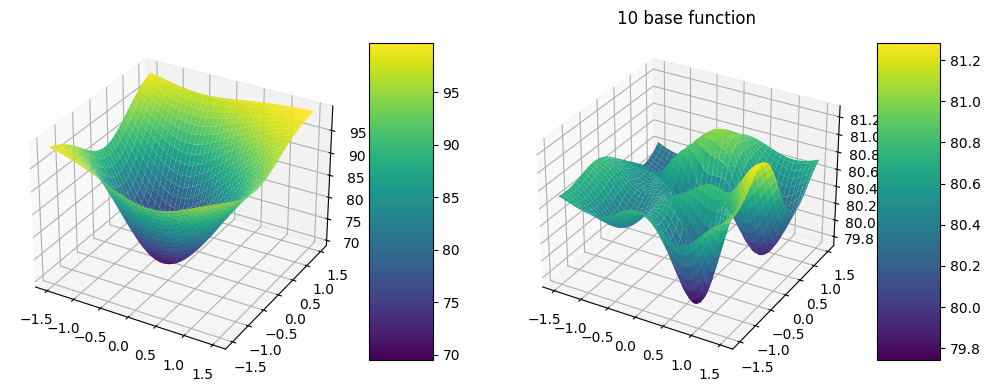

In [ ]:
fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize = (12,16))

surf = ax[0].plot_surface(X,Y,speed_field, cmap='viridis')
ax[0].axes.set_zlim3d(bottom=np.min(speed_field), top=np.max(speed_field))
fig.colorbar(surf, ax=ax[0], shrink=0.5, aspect=5)

surf = ax[1].plot_surface(X,Y,tf.reshape(speed_field_estimate,[151,151]), cmap='viridis')
ax[1].axes.set_zlim3d(bottom=np.min(tf.reshape(speed_field_estimate,[151,151])), top=np.max(tf.reshape(speed_field_estimate,[151,151])))
ax[1].set_title(f'{k} base function')
fig.colorbar(surf, ax=ax[1], shrink=0.5, aspect=5)

# KERNEL PCA

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler


mesh_size = 151 ** 2
num_samples = 100
A = np.zeros((mesh_size, num_samples))

for i in range(num_samples):
  A[:, i] = CP3estimate[i][0].flatten()

scaler = StandardScaler()
data_normalized = scaler.fit_transform(A)


kpca = KernelPCA(kernel='linear', n_components=3, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_normalized)

data_rec=kpca.inverse_transform(data_kpca)
data_rec_scaled = scaler.inverse_transform(data_rec)


import matplotlib.pyplot as plt

# Plot the original speed field
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(speed_field, cmap='viridis')
plt.title('Original Speed Field')
plt.colorbar()

# Plot the reconstructed data
plt.subplot(1, 2, 2)
plt.imshow(data_rec_scaled, cmap='viridis')
plt.title('Reconstructed Data')
plt.colorbar()

plt.tight_layout()
plt.show()



# AUTOENCODER

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

latent_dim = 10

mesh_size = 151 ** 2
num_samples = 100
A = np.zeros((mesh_size, num_samples))

for i in range(num_samples):
  A[:, i] = CP3estimate[i][0].flatten()

#scaler = StandardScaler()
#data_normalized = scaler.fit_transform(A.T)
data_normalized=A.T

input_data = Input(shape=(mesh_size,))
encoded = Dense(latent_dim, activation=None)(input_data)
decoded = Dense(mesh_size, activation=None)(encoded)


# Create the autoencoder model
autoencoder = Model(input_data, decoded)
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
# Train the autoencoder
autoencoder.fit(data_normalized, data_normalized, epochs=500, batch_size=32)


#encoder model
encoder= Model(input_data, encoded)
# decoder model
encoded_input =Input(shape=(latent_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
encoded_test=encoder.predict(data_normalized)
reconstruced_test=decoder.predict(encoded_test)


4/4 [==============================] - 0s 3ms/step


In [ ]:
speed_est=reconstruced_test[69,:]

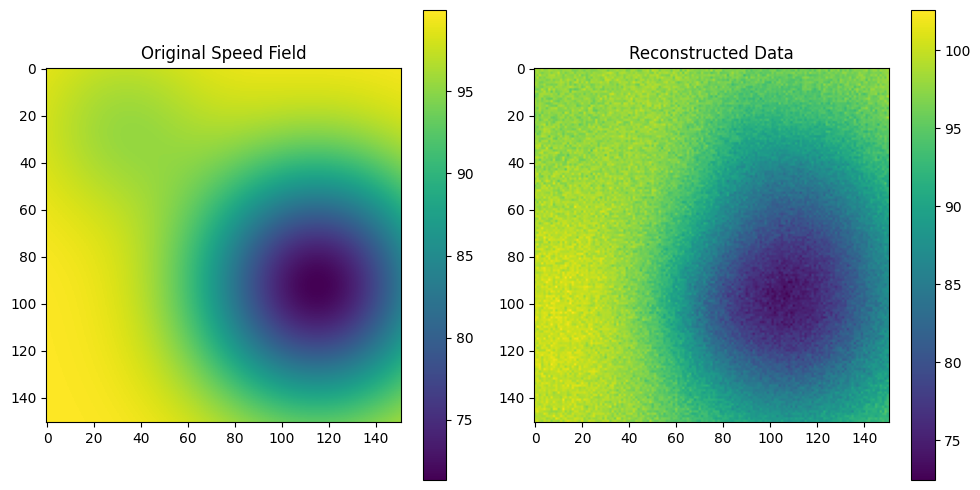

In [ ]:

import matplotlib.pyplot as plt

# Plot the original speed field
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(A[:,69].reshape(151,151), cmap='viridis')
plt.title('Original Speed Field')
plt.colorbar()

# Plot the reconstructed data
plt.subplot(1, 2, 2)
plt.imshow(speed_est.reshape(151,151), cmap='viridis')
plt.title('Reconstructed Data')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
speed_field = CP3estimate[69][0]
mse = np.sqrt(np.mean((speed_field.flatten()-speed_est)**2))
mse

2.391064915943855

In [ ]:
from tensorflow.keras.models import load_model

decoder.save('decoder_model')

In [ ]:
decoder_loaded = load_model('decoder_model')